In [134]:
import pandas as pd
import fiona
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.collections import PatchCollection
from descartes import PolygonPatch
import numpy as np
from shapely.geometry import Polygon, MultiPolygon, shape

In [136]:
od_freguesia = pd.read_csv('intermediate-data/demand.csv')
parish_variation = pd.read_csv('intermediate-data/parish-variation.csv')
variation = pd.read_csv('intermediate-data/variation.csv')
demand = pd.read_csv('intermediate-data/demand.csv')

In [9]:
counties_shapes = [[pol['properties']['NAME_2'], shape(pol['geometry'])] for pol in fiona.open("external-data/gadm36_PRT_shp/gadm36_PRT_2.shp")]
parishes_shapes = [[pol['properties']['NAME_3'], shape(pol['geometry'])] for pol in fiona.open("external-data/gadm36_PRT_shp/gadm36_PRT_3.shp")]

parishes_dict ={}
counties_dict = {}
for p in parishes_shapes:
    parishes_dict[p[0]]=p[1]
    
for p in counties_shapes:
    counties_dict[p[0]]=p[1]

In [ ]:
 [ np.array((geom.xy[0][0], geom.xy[1][0])) for geom in geoms ]

In [ ]:
matplotlib.patches.Polygon(counties_dict['Mação'])

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
#minx, miny, maxx, maxy = mp.bounds
#w, h = maxx - minx, maxy - miny
#ax.set_xlim(minx - 0.2 * w, maxx + 0.2 * w)
#ax.set_ylim(miny - 0.2 * h, maxy + 0.2 * h)

# Whole Country
ax.set_xlim(-9.5, -6.2)
ax.set_ylim(37, 42.2)

# Lisbon Area
#ax.set_xlim(-9.5, -9)
#ax.set_ylim(38.5, 38.9)

# Porto Area
#ax.set_xlim(-8.9, -8.125)
#ax.set_ylim(41, 41.5)

ax.set_aspect(1)

patches = []
for idx, p in enumerate(not_in_freguesias):
    patches.append(PolygonPatch(p, fc='grey', ec='#555555', alpha=0.3, zorder=2))
for idx, p in enumerate(in_freguesias):
    patches.append(PolygonPatch(p, fc='red', ec='#555555', alpha=1., zorder=1))
#for idx, p in enumerate(all_counties):
#    patches.append(PolygonPatch(p, fc='grey', ec='#555555', alpha=0.3, zorder=2))
#for idx, p in enumerate(origin_counties):
#    patches.append(PolygonPatch(p, fc='red', ec='#555555', alpha=1., zorder=1))
ax.add_collection(PatchCollection(patches, match_original=True))

plt.show()

# Plotting County Churn

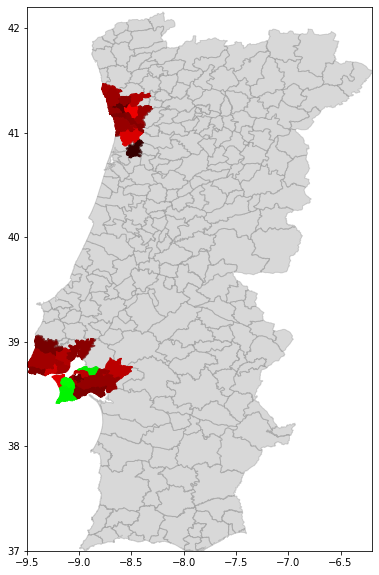

In [133]:
first_period = variation.groupby('County_of_Origin')['Average_BusUsers_per_Day_first'].sum().to_frame().reset_index().sort_values('County_of_Origin', ascending=False)
county_change = variation.groupby('County_of_Origin')['Variation_abs'].sum().to_frame().reset_index().sort_values('County_of_Origin', ascending=False)
county_change['Variation_rel'] = county_change['Variation_abs'] / first_period['Average_BusUsers_per_Day_first']
display(county_change.sort_values('Variation_rel', ascending=False).head(2))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

# Whole Country
ax.set_xlim(-9.5, -6.2)
ax.set_ylim(37, 42.2)

## Lisbon Area
#ax.set_xlim(-9.5, -9)
#ax.set_ylim(38.5, 38.9)

# Porto Area
#ax.set_xlim(-8.9, -8.125)
#ax.set_ylim(41, 41.5)

# Greater Porto Area
#ax.set_xlim(-8.9, -8.125)
#ax.set_ylim(40.7, 41.5)

# Greater Lisbon Area
#ax.set_xlim(-9.55, -8.5)
#ax.set_ylim(38.4, 39.1)

ax.set_aspect(1)
norm = colors.Normalize(vmin=-1, vmax=1)
patches = []

for name, shape in counties_dict.items():    
    if shape.geom_type == 'MultiPolygon':
        for polygon in shape:
            if name in county_change.County_of_Origin.tolist():
                c = county_change.loc[county_change['County_of_Origin'] == name].values[0][2]
                if c >0:
                    g=1-c
                    r=0
                else:
                    r=1+c
                    g=0
                plt.fill(*polygon.exterior.xy, color=(r, g, 0)) 
            else:
                plt.fill(*polygon.exterior.xy, color=((1/2, 1/2, 1/2)), alpha = 0.3)
    else:
        if name in county_change.County_of_Origin.tolist():
            c = county_change.loc[county_change['County_of_Origin'] == name].values[0][2]
            if c >0:
                g=1-c
                r=0
            else:
                r=1+c
                g=0
            plt.fill(*counties_dict[name].exterior.xy, color=(r,g , 0))
        else:
            plt.fill(*counties_dict[name].exterior.xy, color=((1/2, 1/2, 1/2)), alpha = 0.3)
    
plt.show()

In [155]:
county_change = variation.groupby('County_of_Origin')[['Average_BusUsers_per_Day_first', 'Average_BusUsers_per_Day_second']].sum().reset_index().sort_values('County_of_Origin', ascending=False)
county_change['Mean']=county_change.Average_BusUsers_per_Day_first*5/11+county_change.Average_BusUsers_per_Day_second*6/11

In [163]:
county_change.Mean

31      377.987086
30    13451.953277
29     7901.733713
28     4392.708755
27      745.888030
26     6514.979937
25     3413.706199
24      634.126685
23    10568.399879
22       35.594344
21     2300.910115
20     1699.103618
19    34629.238162
18      374.375176
17     3414.655689
16     1597.213310
15    21052.517581
14    13642.911785
13     1616.264053
12     1199.320402
11    12406.939814
10    31764.265623
9      2307.070170
8      7062.183694
7     22353.735372
6     61880.240460
5       532.722811
4      9540.749794
3      6731.530991
2      7623.189905
1      7749.325282
0       153.571093
Name: Mean, dtype: float64

In [170]:
import math

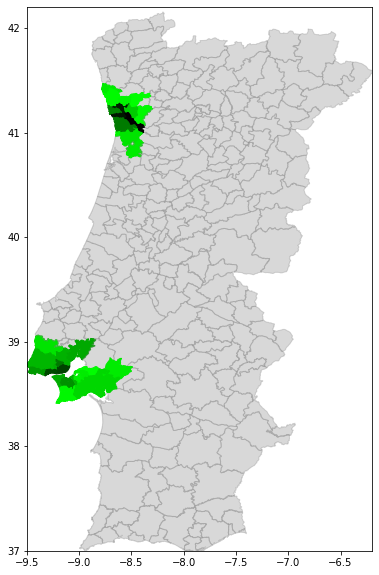

In [174]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

# Whole Country
ax.set_xlim(-9.5, -6.2)
ax.set_ylim(37, 42.2)

## Lisbon Area
#ax.set_xlim(-9.5, -9)
#ax.set_ylim(38.5, 38.9)

# Porto Area
#ax.set_xlim(-8.9, -8.125)
#ax.set_ylim(41, 41.5)

# Greater Porto Area
#ax.set_xlim(-8.9, -8.125)
#ax.set_ylim(40.7, 41.5)

# Greater Lisbon Area
#ax.set_xlim(-9.55, -8.5)
#ax.set_ylim(38.4, 39.1)

ax.set_aspect(1)
norm = colors.Normalize(vmin=-1, vmax=1)
patches = []

for name, shape in counties_dict.items():    
    if shape.geom_type == 'MultiPolygon':
        for polygon in shape:
            if name in county_change.County_of_Origin.tolist():
                c = county_change.loc[county_change['County_of_Origin'] == name].values[0][3]/61880.24046027273
                
                plt.fill(*polygon.exterior.xy, color=(0, (1-c)*(1-c)*(1-c), 0)) 
            else:
                plt.fill(*polygon.exterior.xy, color=((1/2, 1/2, 1/2)), alpha = 0.3)
    else:
        if name in county_change.County_of_Origin.tolist():
            c = county_change.loc[county_change['County_of_Origin'] == name].values[0][3]/61880.24046027273

            plt.fill(*counties_dict[name].exterior.xy, color=(0,(1-c)*(1-c)*(1-c), 0))
        else:
            plt.fill(*counties_dict[name].exterior.xy, color=((1/2, 1/2, 1/2)), alpha = 0.3)
    
plt.show()

# Plot Mean Number of Travellers

In [146]:
parish_variation.loc[parish_variation['Parish_of_Public_Transportation'] == 'Benfica'].values[0][-1]

0.2526020927776667

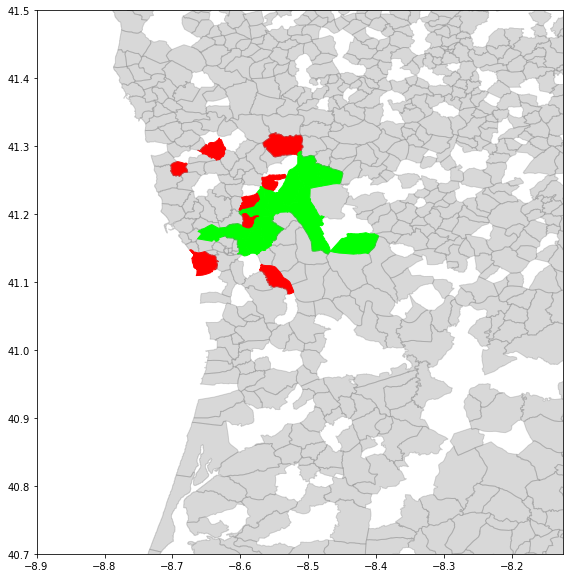

In [149]:


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

# Whole Country
ax.set_xlim(-9.5, -6.2)
ax.set_ylim(37, 42.2)

## Lisbon Area
#ax.set_xlim(-9.5, -9)
#ax.set_ylim(38.5, 38.9)

# Porto Area
#ax.set_xlim(-8.9, -8.125)
#ax.set_ylim(41, 41.5)

# Greater Porto Area
ax.set_xlim(-8.9, -8.125)
ax.set_ylim(40.7, 41.5)

# Greater Lisbon Area
#ax.set_xlim(-9.55, -8.5)
#ax.set_ylim(38.4, 39.1)

ax.set_aspect(1)
norm = colors.Normalize(vmin=-1, vmax=1)
patches = []

for name, shape in parishes_dict.items():    
    if shape.geom_type == 'MultiPolygon':
        for polygon in shape:
            if name in parish_variation.Parish_of_Public_Transportation.tolist():
                c = parish_variation.loc[parish_variation['Parish_of_Public_Transportation'] == name].values[0][-1]
                if c >0:
                    g=1-c
                    r=0
                else:
                    r=1+c
                    g=0
                plt.fill(*polygon.exterior.xy, color=(r, g, 0)) 
            else:
                plt.fill(*polygon.exterior.xy, color=((1/2, 1/2, 1/2)), alpha = 0.3)
    else:
        if name in parish_variation.Parish_of_Public_Transportation.tolist():
            c = parish_variation.loc[parish_variation['Parish_of_Public_Transportation'] == name].values[0][-1]
            if c >0:
                g=1-c
                r=0
            else:
                r=1+c
                g=0
            plt.fill(*parishes_dict[name].exterior.xy, color=(r,g , 0))
        else:
            plt.fill(*parishes_dict[name].exterior.xy, color=((1/2, 1/2, 1/2)), alpha = 0.3)
    
plt.show()